# Chapter 1 : Data Preprocessing

### 문제 0.

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import tslearn as ts
import scalecast as sc
import pmdarima as pa
import statsmodels as st

### 문제 1.

In [267]:
oil = pd.read_csv("oil.csv")
sales = pd.read_csv("sales.csv")
stores = pd.read_csv("stores.csv")
holidays_events = pd.read_csv("holidays_events.csv")

### 문제 2.

#### sales

In [268]:
# 열 6개 시계열 데이터 
# 패널 데이터네
print(sales.head(3))

# 시계열 데이터 기간 2014/07/01 ~ 2018/08/15
# 근데 끊기는 지점없이 이어져있는 지는 확인해봐야함
print(sales["date"].head(1))
print(sales["date"].tail(1))

# 행 2029698 (왤케 많음?) 열 6개
print(sales.shape)

# 기초통계량 확인
sales.describe()

       id        date  store_nbr      family  sales  onpromotion
0  971190  2014-07-01          1  AUTOMOTIVE    2.0            0
1  971191  2014-07-01          1   BABY CARE    0.0            0
2  971192  2014-07-01          1      BEAUTY    6.0            0
0    2014-07-01
Name: date, dtype: object
2029697    2017-08-15
Name: date, dtype: object
(2029698, 6)


,id,store_nbr,sales,onpromotion
count,2.029698e+06,2.029698e+06,2.029698e+06,2.029698e+06
mean,1.986038e+06,2.750000e+01,4.150122e+02,3.830921e+00
std,5.859235e+05,1.558579e+01,1.218749e+03,1.468650e+01
min,9.711900e+05,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.478614e+06,1.400000e+01,1.000000e+00,0.000000e+00
50%,1.986038e+06,2.750000e+01,1.800000e+01,0.000000e+00
75%,2.493463e+06,4.100000e+01,2.380000e+02,1.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


33
['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


<AxesSubplot: ylabel='sales'>

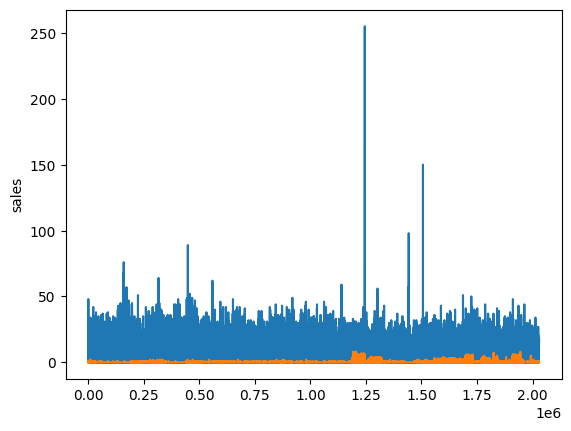

In [269]:
# 종류가 몇 종류나 있나 알아보기
# 33종류(많네요 ㅋ)
print(sales["family"].nunique())
print(sales["family"].unique())


# 시계열 데이터니까 무지성 timeseries plot 그려볼라하였으나 패널이니까
# AUTOMOTIVE 하나만 그려보기
sns.lineplot(sales.loc[sales["family"]=="AUTOMOTIVE","sales"])
sns.lineplot(sales.loc[sales["family"]=="AUTOMOTIVE","onpromotion"])

#### oil

In [270]:
# 매우 간단한 형태로 구성
# 시계열 데이터 기간 2014/07/01 ~ 2014/07/31
print(oil.head(3))
print(oil.tail(3))

# 행 805
print(oil.shape)

# 기초통계량 확인
oil.describe()

         date  dcoilwtico
0  2014-07-01      106.06
1  2014-07-02      105.18
2  2014-07-03      104.76
           date  dcoilwtico
802  2017-07-27       49.05
803  2017-07-28       49.72
804  2017-07-31       50.21
(805, 2)


,dcoilwtico
count,776.000000
mean,53.141379
std,16.829996
min,26.190000
25%,44.687500
50%,48.490000
75%,53.802500
max,106.060000


<AxesSubplot: >

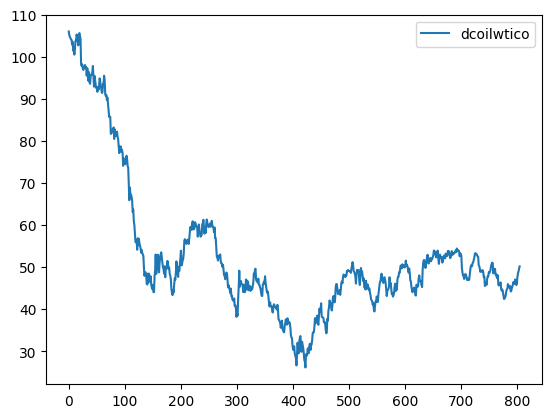

In [271]:
# 시계열 데이터니까 무지성 timeseries plot 그려보기
sns.lineplot(oil)

#### stores

In [272]:
# 열 6개 시계열 데이터 
print(stores.head(10))

# 행 54, 열 5
print(stores.shape)

# 기초통계량 확인
stores.describe()

   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
5          6          Quito                       Pichincha    D       13
6          7          Quito                       Pichincha    D        8
7          8          Quito                       Pichincha    D        8
8          9          Quito                       Pichincha    B        6
9         10          Quito                       Pichincha    C       15
(54, 5)


,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [273]:
# 종류가 몇 종류나 있나 알아보기
print(stores["city"].nunique())
print(stores["city"].unique())

print(stores["state"].nunique())
print(stores["state"].unique())

22
['Quito' 'Santo Domingo' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']
16
['Pichincha' 'Santo Domingo de los Tsachilas' 'Cotopaxi' 'Chimborazo'
 'Imbabura' 'Bolivar' 'Pastaza' 'Tungurahua' 'Guayas' 'Santa Elena'
 'Los Rios' 'Azuay' 'Loja' 'El Oro' 'Esmeraldas' 'Manabi']


#### holidays_events

In [274]:
# 열 6개 시계열 데이터 
print(holidays_events.head(10))

# 행 233, 열 6
print(holidays_events.shape)

# 기초통계량 확인
holidays_events.describe()

         date     type    locale    locale_name  \
0  2014-07-01    Event  National        Ecuador   
1  2014-07-03  Holiday     Local      El Carmen   
2  2014-07-03  Holiday     Local  Santo Domingo   
3  2014-07-04    Event  National        Ecuador   
4  2014-07-05    Event  National        Ecuador   
5  2014-07-08    Event  National        Ecuador   
6  2014-07-09    Event  National        Ecuador   
7  2014-07-12    Event  National        Ecuador   
8  2014-07-13    Event  National        Ecuador   
9  2014-07-23  Holiday     Local        Cayambe   

                                       description  transferred  
0       Mundial de futbol Brasil: Octavos de Final        False  
1                       Cantonizacion de El Carmen        False  
2                       Fundacion de Santo Domingo        False  
3       Mundial de futbol Brasil: Cuartos de Final        False  
4       Mundial de futbol Brasil: Cuartos de Final        False  
5            Mundial de futbol Brasil: Sem

,date,type,locale,locale_name,description,transferred
count,233,233,233,233,233,233
unique,209,6,3,24,97,2
top,2016-06-25,Holiday,National,Ecuador,Carnaval,False
freq,3,136,123,123,6,223


### 문제 3.

In [275]:
data = pd.merge(sales,oil,on="date")
data = pd.merge(data,stores,on="store_nbr")

In [276]:
oil

,date,dcoilwtico
0,2014-07-01,106.06
1,2014-07-02,105.18
2,2014-07-03,104.76
3,2014-07-04,NaN
4,2014-07-07,104.19
...,...,...
800,2017-07-25,47.77
801,2017-07-26,48.58
802,2017-07-27,49.05
803,2017-07-28,49.72


### 문제 4.

In [277]:
# transferred True인 열 삭제
holidays_events = holidays_events.query("transferred==False")

In [278]:
# datetime으로 전처리
data["date"]=pd.to_datetime(data["date"])
holidays_events["date"]=pd.to_datetime(holidays_events["date"])

In [279]:
# data에서 최대 날짜 2017/07/31 이후의 holiday는 필요없음
print(min(data["date"]))

# 최대 날짜 2017/07/31
print(max(data["date"]))

# cut point 변수 생성
cut_point = pd.to_datetime("2017-08-01")

2014-07-01 00:00:00
2017-07-31 00:00:00


In [280]:
# holidays_events에서 필요없는 행( 최대 날짜 이후 행 제거 )
holidays_events = holidays_events[holidays_events["date"] < cut_point]

In [281]:
# data 에 holiday 열 생성하고 0으로 초기화
data[["holiday"]]=[0]

In [282]:
# 공휴일은 국가 단위, 시, 도 단위로 나눠짐 3가지 경우로 나눠서 각각 반영 할 예정
holidays_events["locale"].unique()

array(['National', 'Local', 'Regional'], dtype=object)

In [283]:
# 1. 국가 공휴일 반영하기 date만 신경쓰면됨
national = holidays_events.query("locale=='National'")["date"]

# 국가 공휴일 적용
data.loc[data["date"].isin(national),"holiday"]=1

In [284]:
# 2. State 공휴일 반영하기 locale_name과 date를 신경써야함
regional = holidays_events.query("locale == 'Regional'")[["date","locale_name"]]

# State 공휴일 적용
data.loc[data["date"].isin(regional["date"])&data["state"].isin(regional["locale_name"]),"holiday"]=1

In [285]:
# 3. Local 공휴일 반영하기 locale_name과 date를 신경써야함
local = holidays_events.query("locale == 'Local'")[["date","locale_name"]]

# Local 공휴일 적용
data.loc[data["date"].isin(local["date"])&data["city"].isin(local["locale_name"]),"holiday"]=1

### 문제 5.

In [286]:
data = data.drop(["id"],axis=1)

### 문제 6.

In [287]:
# date열은 이미 위에서 작업하였음
# cluster과 holiday를 object로 변경하여야함
data.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dcoilwtico            float64
city                   object
state                  object
type                   object
cluster                 int64
holiday                 int64
dtype: object

In [288]:
data[["cluster","holiday"]] = data[["cluster","holiday"]].astype("object")

In [289]:
# 변경된것 확인
data.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dcoilwtico            float64
city                   object
state                  object
type                   object
cluster                object
holiday                object
dtype: object

### 문제 7.

In [290]:
# year,month,weekday 변수 생성
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["weekday"] = data["date"].dt.weekday

In [291]:
# 확인용
data.head(3)

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holiday,year,month,weekday
0,2014-07-01,1,AUTOMOTIVE,2.0,0,106.06,Quito,Pichincha,D,13,1,2014,7,1
1,2014-07-01,1,BABY CARE,0.0,0,106.06,Quito,Pichincha,D,13,1,2014,7,1
2,2014-07-01,1,BEAUTY,6.0,0,106.06,Quito,Pichincha,D,13,1,2014,7,1


### 문제 8.

In [292]:
# 31 - 17 + 1 =15
# 2014/07/01 ~ 2017/07/16 train
# 2017/07/17 ~ 2017/07/31 test
max(data["date"])

Timestamp('2017-07-31 00:00:00')

In [293]:
# 기간에 맞게 cut off point 지정
train_point = pd.to_datetime("2017-07-16")

# 기간에 맞게 train,valid set 분리
train = data[data["date"] <= train_point]
valid = data[data["date"] > train_point]

### 문제 9.

In [294]:
# date와 store_nbr를 기준으로 sales를 합쳐야함
nbr_sales = data.groupby(["date","store_nbr"])['sales'].sum()

# 원하는 형태는 store_nbr과 sales를 열로 갖는 데이터프레임임
nbr_sales = nbr_sales.unstack(level="store_nbr")
final = pd.melt(nbr_sales)

In [295]:
# 확인용
final

,store_nbr,value
0,1,9649.172980
1,1,14812.346000
2,1,9593.299000
3,1,11822.021000
4,1,10168.345014
...,...,...
43357,54,8241.906000
43358,54,6572.494000
43359,54,6911.345000
43360,54,9531.089998


In [296]:
# 3000 이하인 행을 추출하고 count를 세어 전체 count로 나누어 비율을 구할 것임

# 3000이하인 행 추출
under_3000 = final.query("value < 3000")

# 3000이하인 행과 전체 행에 대하여 store_nbr을 기준으로 groupby하고 count로 갯수를 세고 나누어 비율을 구함
under_3000_group = under_3000.groupby("store_nbr")['value'].count()/final.groupby("store_nbr")["value"].count()

# list로 반환
final_store = list(under_3000_group.index[under_3000_group<0.1])

In [297]:
# 위에서 반환한 리스트에 포함될 경우 남김
data = data[data["store_nbr"].isin(final_store)]

### 문제 10.

In [298]:
# sales 가 3000 이하 인 열만 뽑아서 날짜를 세고 그걸 전체 날짜로 나눌 것임

# sales 가 3000 이하 인 열 추출
under_10 = data.query("sales < 10")

# sales가 3000이하 인 열을 family별로 count하고 전체 데이터를 family별로 카운트하고 두 값을 나누어 비율을 계산
under_10_group = under_10.groupby('family')['sales'].count()/data.groupby("family")['sales'].count()

# 그 비율이 10퍼센트 미만인 경우를 list로 반환
final_family = list(under_10_group.index[under_10_group<0.1])

In [299]:
# 위에서 반환한 리스트에 포함될 경우 남김
data = data[data["family"].isin(final_family)]

### 문제 11.

In [307]:
mean_for_sh = data.groupby(["store_nbr","holiday"])['sales'].mean()

#### 문제 11-1.

In [312]:
h0 = data.query("holiday == 0")
h1 = data.query("holiday == 1")
h0 = h0.groupby("store_nbr")['sales'].mean()
h1 = h1.groupby("store_nbr")['sales'].mean()

Text(0.5, 1.0, 'Holiday1 Sales Histogram')

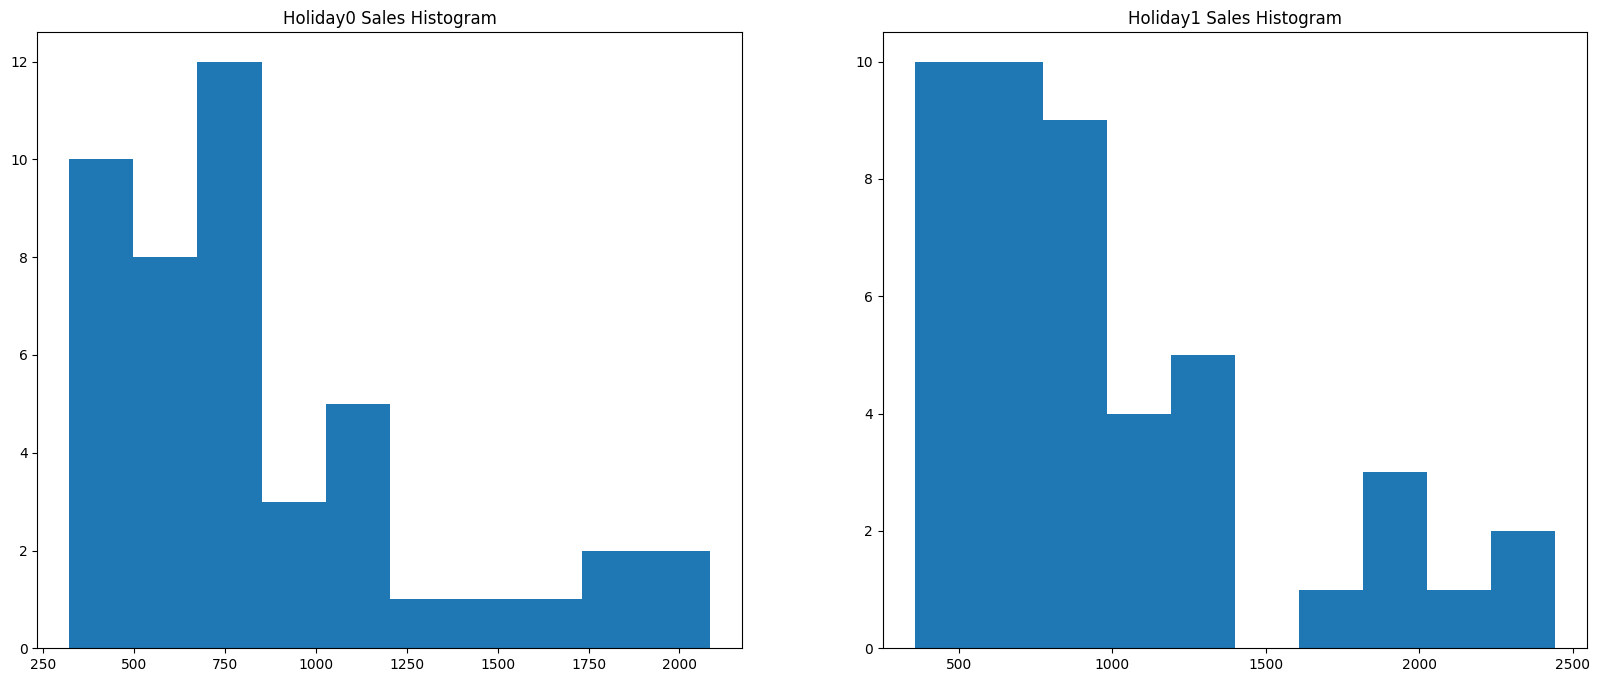

In [320]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(h0)
plt.title("Holiday0 Sales Histogram")
plt.subplot(1,2,2)
plt.hist(h1)
plt.title("Holiday1 Sales Histogram")

#### 문제 11-2.